Hausaufgabe zum 16.05.2024 - Deskriptive Statistik


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
## Zusammenführen der drei Datensätze in einem Dataframe
#Pfade zuteilen
pfad_1 = 'kiwo.csv'
pfad_2 = 'umsatzdaten_gekuerzt.csv'
pfad_3 = 'wetter.csv'

# Einlesen der CSVs
daten_1 = pd.read_csv(pfad_1, usecols=['Datum', 'KielerWoche'])
daten_2 = pd.read_csv(pfad_2, usecols=['Datum', 'Warengruppe', 'Umsatz'])
daten_3 = pd.read_csv(pfad_3, usecols=['Datum', 'Temperatur', 'Windgeschwindigkeit', 'Bewoelkung', 'Windgeschwindigkeit', 'Wettercode'])

#Zusammenführen der df
# Datensätze zusammenführen mit Outer Join
merged_df = pd.merge(daten_1, daten_2, how='outer', on='Datum')
merged_df = pd.merge(merged_df, daten_3, how='outer', on='Datum')

merged_df.shape
print(merged_df)

            Datum  KielerWoche  Warengruppe  Umsatz  Bewoelkung  Temperatur  \
0      2012-01-01          NaN          NaN     NaN         8.0      9.8250   
1      2012-01-02          NaN          NaN     NaN         7.0      7.4375   
2      2012-01-03          NaN          NaN     NaN         8.0      5.5375   
3      2012-01-04          NaN          NaN     NaN         4.0      5.6875   
4      2012-01-05          NaN          NaN     NaN         6.0      5.3000   
...           ...          ...          ...     ...         ...         ...   
10114  2019-07-28          NaN          NaN     NaN         3.0     23.3500   
10115  2019-07-29          NaN          NaN     NaN         6.0     25.2500   
10116  2019-07-30          NaN          NaN     NaN         7.0     20.7375   
10117  2019-07-31          NaN          NaN     NaN         6.0     20.4500   
10118  2019-08-01          NaN          NaN     NaN         5.0     21.0625   

       Windgeschwindigkeit  Wettercode  
0         

In [13]:

# Anschauen der Klassen der Variablen
column_classes = merged_df.dtypes
# Umändern der Datumsspalte ins Datumsformat
#merged_df['Datum'] = pd.to_datetime(df_gemeinsam['Datum'])
print(column_classes)

Datum                  datetime64[ns]
KielerWoche                   float64
Warengruppe                   float64
Umsatz                        float64
Bewoelkung                    float64
Temperatur                    float64
Windgeschwindigkeit           float64
Wettercode                    float64
dtype: object


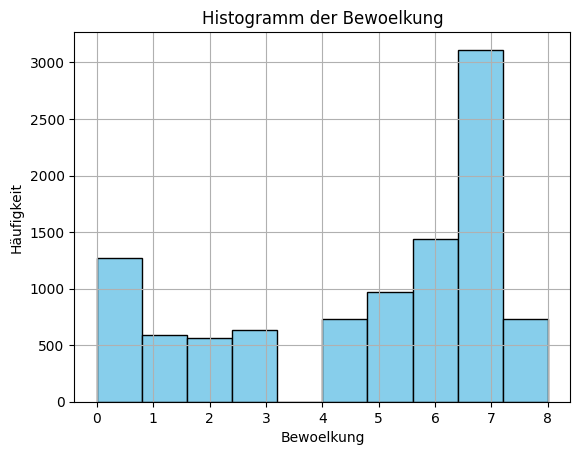


Statistische Grundparameter für Bewoelkung:
Mittlerer Wert: 4.748507165605096
Median: 6.0
Minimum: 0.0
Maximum: 8.0
Standardabweichung: 2.6282847489109744
-----------------------------


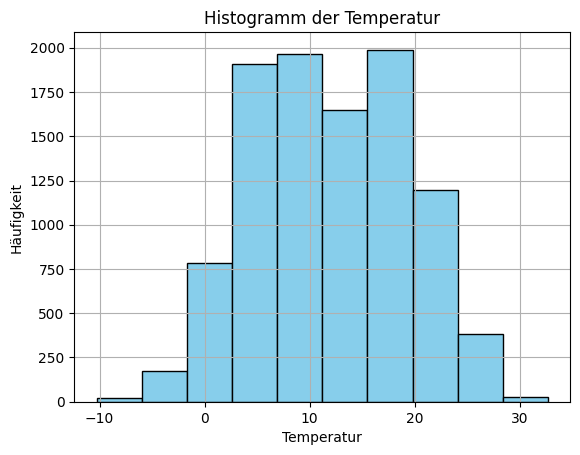


Statistische Grundparameter für Temperatur:
Mittlerer Wert: 12.014559982579433
Median: 11.625
Minimum: -10.25
Maximum: 32.671428
Standardabweichung: 7.212466219070918
-----------------------------


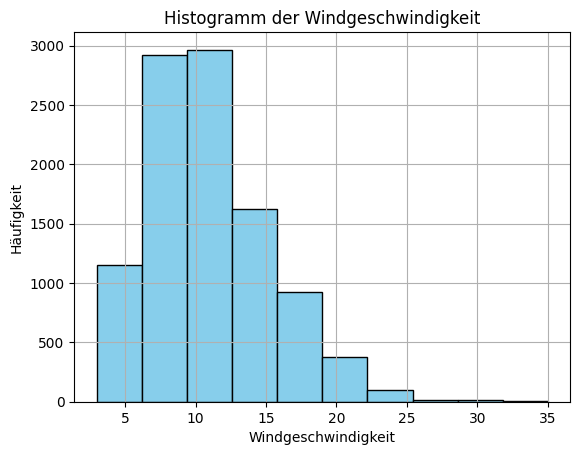


Statistische Grundparameter für Windgeschwindigkeit:
Mittlerer Wert: 11.026526774225477
Median: 10.0
Minimum: 3.0
Maximum: 35.0
Standardabweichung: 4.13177433783922
-----------------------------


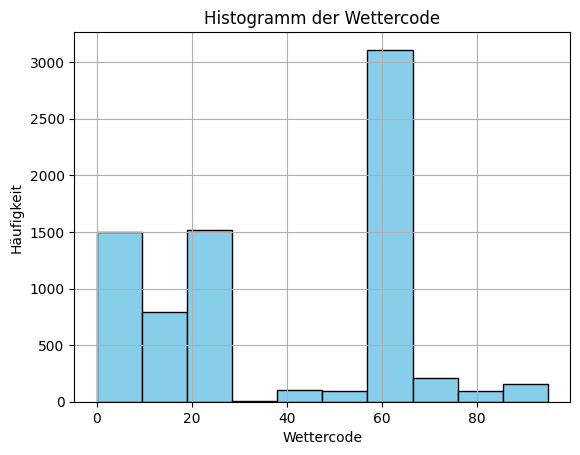


Statistische Grundparameter für Wettercode:
Mittlerer Wert: 37.07202216066482
Median: 28.0
Minimum: 0.0
Maximum: 95.0
Standardabweichung: 27.207627063663466
-----------------------------


In [14]:
# Histogram und Grundparameter Statistik für Wettervariablen erstellen
# Liste der Wettervariablen
weather_variables = ['Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']

# Schleife über jede Wettervariable
for var in weather_variables:
    # Histogramm erstellen
    plt.hist(merged_df[var], bins=10, color='skyblue', edgecolor='black')
    plt.xlabel(var)
    plt.ylabel('Häufigkeit')
    plt.title(f'Histogramm der {var}')
    plt.grid(True)
    plt.show()
    
    # Grundlegende Parameter berechnen
    mean_var = merged_df[var].mean()
    median_var = merged_df[var].median()
    min_var = merged_df[var].min()
    max_var = merged_df[var].max()
    std_var = merged_df[var].std()
    
    # Statistische Grundparameter ausgeben
    print(f"\nStatistische Grundparameter für {var}:")
    print("Mittlerer Wert:", mean_var)
    print("Median:", median_var)
    print("Minimum:", min_var)
    print("Maximum:", max_var)
    print("Standardabweichung:", std_var)
    print("-----------------------------")

Gefilterte Daten:
          Datum  KielerWoche  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
394  2014-05-27          NaN          1.0  148.828353         6.0     17.8375   
395  2014-05-28          NaN          2.0  535.856285         6.0     17.8375   
396  2014-05-29          NaN          3.0  201.198426         6.0     17.8375   
397  2014-05-30          NaN          4.0   65.890169         6.0     17.8375   
398  2014-05-31          NaN          5.0  317.475875         6.0     17.8375   
...         ...          ...          ...         ...         ...         ...   
9761 2013-05-22          NaN          1.0  123.075682         5.0     31.2875   
9762 2013-05-23          NaN          2.0  586.081666         5.0     31.2875   
9763 2013-05-24          NaN          3.0  285.872616         5.0     31.2875   
9764 2013-05-25          NaN          4.0   57.102795         5.0     31.2875   
9765 2013-05-26          NaN          5.0  261.341313         5.0     31.2875   

      Win

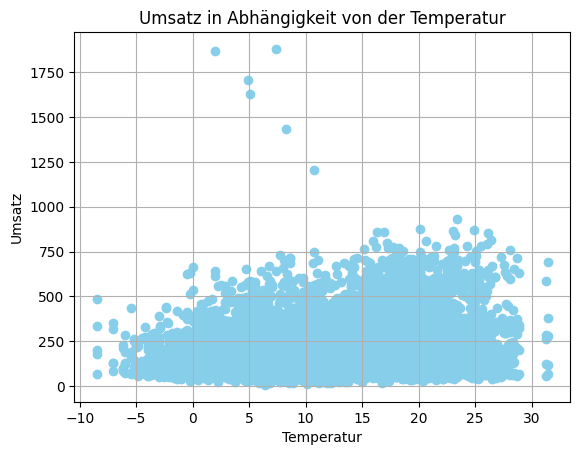

In [17]:
# Scaterplott für Temperatur und Umsatz erstellen

df_filtered = merged_df.dropna(subset=['Umsatz'])
pd.reset_option('display.max_rows', None)
print("Gefilterte Daten:")
print(df_filtered)
# Anzahl der NaN-Werte in der Spalte "Temperatur" zählen
nan_count = df_filtered['Temperatur'].isna().sum()

print("Anzahl der NaN-Werte in der Temperaturvariable:", nan_count)

# Scatterplot erstellen
plt.scatter(df_filtered['Temperatur'], df_filtered['Umsatz'], color='skyblue')
plt.xlabel('Temperatur')
plt.ylabel('Umsatz')
plt.title('Umsatz in Abhängigkeit von der Temperatur')
plt.grid(True)
plt.show()
